<a href="https://colab.research.google.com/github/gg5d/DS-3005/blob/main/MML_Python%2C_Ch_02_sp2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sympy import *
import numpy as np
import numpy.linalg as npl
import pandas as pd
init_printing(use_unicode=True)
from IPython.display import display

How to use **sympy** in Linear Algebra
[Matrices in sympy](https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html)

# Chapter 02. Linear Algebra


## 2.1 Systems of Linear Equations


### Example 2.2

In [ ]:
mat = Matrix([[1,1,1],[1,-1,2],[2,0,3]])
sol = Matrix([3,2,1])
try:
  mat.solve(sol)
except:
  pprint(Matrix.hstack(mat, sol))
  print("Not solveable. Adding rows 1 and 2 contradicts row 3.")

⎡1  1   1  3⎤
⎢           ⎥
⎢1  -1  2  2⎥
⎢           ⎥
⎣2  0   3  1⎦
Not solveable. Adding rows 1 and 2 contradicts row 3.


In [ ]:
mat = Matrix([[1,1,1],[1,-1,2],[0,1,1]])
sol = Matrix([3,2,2])
pprint(Matrix.hstack(mat, sol))
print("Solveable. Adding row 1 and 3 reveals x = 1, which fits with all rows.")
mat.solve(sol)

⎡1  1   1  3⎤
⎢           ⎥
⎢1  -1  2  2⎥
⎢           ⎥
⎣0  1   1  2⎦
Solveable. Adding row 1 and 3 reveals x = 1, which fits with all rows.


Matrix([
[1],
[1],
[1]])

In [ ]:
mat = Matrix([[1,1,1],[1,-1,2],[2,0,3]])
sol = Matrix([3,2,1])
try:
  mat.solve(sol)
except:
  pprint(Matrix.hstack(mat, sol))
  print("Not solveable. Adding rows 1 and 2 contradicts row 3.")

⎡1  1   1  3⎤
⎢           ⎥
⎢1  -1  2  2⎥
⎢           ⎥
⎣2  0   3  1⎦
Not solveable. Adding rows 1 and 2 contradicts row 3.


In [ ]:
mat = Matrix([[1,1,1],[1,-1,2],[2,0,3]])
sol = Matrix([3,2,5])
try:
  mat.solve(sol)
except:
  pprint(Matrix.hstack(mat, sol))
  print("Solution of coefficients multiplied with any # in R. I.e. Infinite real solutions.")

⎡1  1   1  3⎤
⎢           ⎥
⎢1  -1  2  2⎥
⎢           ⎥
⎣2  0   3  5⎦
Solution of coefficients multiplied with any # in R. I.e. Infinite real solutions.


#### Figure 2.3
The solution space of a system of two linear equations with two variables can be geometrically interepreted as the interesection of two lines. Every linear equation represents a line.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
vals = np.linspace(-10,10,10000)

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)

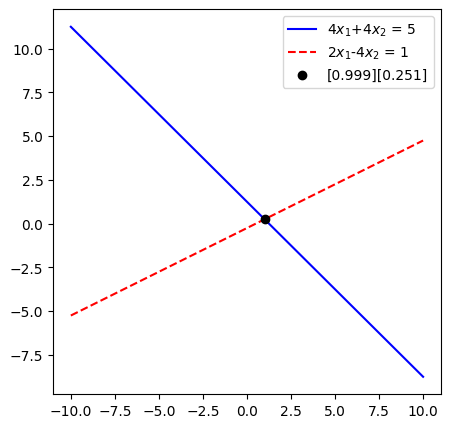

In [ ]:
eq0 = lambda x1: (5-4*x1)/4 # 4x1+4x2 = 5
y0 = eq0(vals)

eq1 = lambda x1: (1-2*x1)/-4 # 2x1-4x2 = 1
y1 = eq1(vals)

plt.plot(vals,y0,c="blue")
plt.plot(vals,y1,"--",c="red")
idx = np.argwhere(np.diff(np.sign(y0 - y1))).flatten() # finds the intersection between two graphs
plt.plot(vals[idx],y0[idx],'ko')
plt.legend(["4$x_1$+4$x_2$ = 5","2$x_1$-4$x_2$ = 1",str(np.round(vals[idx],3)) + str(np.round(y0[idx],3))]);

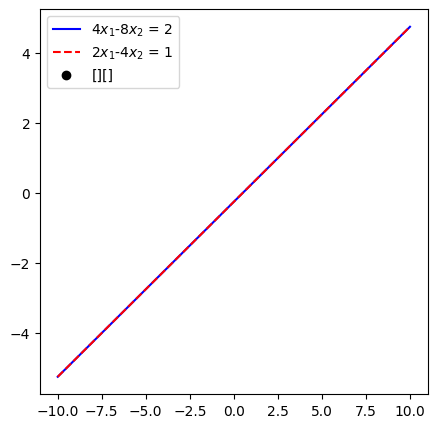

In [ ]:
eq0 = lambda x1: (2-4*x1)/-8 # 4x1-8x2 = 2
y0 = eq0(vals)

eq1 = lambda x1: (1-2*x1)/-4 # 2x1-4x2 = 1
y1 = eq1(vals)

plt.plot(vals,y0,c="blue")
plt.plot(vals,y1,"--",c="red")
idx = np.argwhere(np.diff(np.sign(y0 - y1))).flatten() # finds the intersection between two graphs
plt.plot(vals[idx],y0[idx],'ko')
plt.legend(["4$x_1$-8$x_2$ = 2","2$x_1$-4$x_2$ = 1",str(np.round(vals[idx],3)) + str(np.round(y0[idx],3))]);

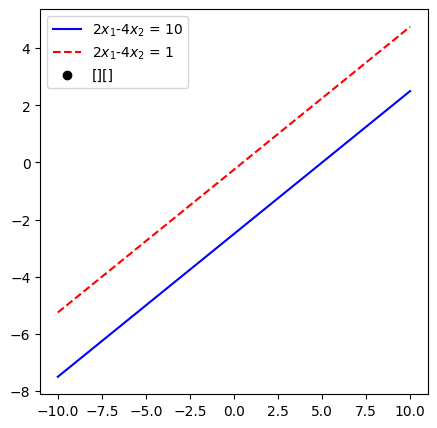

In [ ]:
eq0 = lambda x1: (10-2*x1)/-4 # 2x1-4x2 = 10
y0 = eq0(vals)

eq1 = lambda x1: (1-2*x1)/-4 # 2x1-4x2 = 1
y1 = eq1(vals)

plt.plot(vals,y0,c="blue")
plt.plot(vals,y1,"--",c="red")
idx = np.argwhere(np.diff(np.sign(y0 - y1))).flatten() # finds the intersection between two graphs
plt.plot(vals[idx],y0[idx],'ko')
plt.legend(["2$x_1$-4$x_2$ = 10","2$x_1$-4$x_2$ = 1",str(np.round(vals[idx],3)) + str(np.round(y0[idx],3))]);

## 2.2 Matrices


#### Figure 2.4
*By stacking its columns, a matrix A can be represented as a long vector a.*

In [44]:
A = Matrix([1.2,1.2,1.2,1.2])
display('A:',A)


'A:'

⎡1.2⎤
⎢   ⎥
⎢1.2⎥
⎢   ⎥
⎢1.2⎥
⎢   ⎥
⎣1.2⎦

In [45]:
B = Matrix([2,2,2,2])
display('B:',B)


'B:'

⎡2⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣2⎦

In [46]:
display("Horizontal stack:", Matrix.hstack(A,B))


'Horizontal stack:'

⎡1.2  2⎤
⎢      ⎥
⎢1.2  2⎥
⎢      ⎥
⎢1.2  2⎥
⎢      ⎥
⎣1.2  2⎦

In [47]:
display("Vertical stack:",Matrix.vstack(A,B))

'Vertical stack:'

⎡1.2⎤
⎢   ⎥
⎢1.2⎥
⎢   ⎥
⎢1.2⎥
⎢   ⎥
⎢1.2⎥
⎢   ⎥
⎢ 2 ⎥
⎢   ⎥
⎢ 2 ⎥
⎢   ⎥
⎢ 2 ⎥
⎢   ⎥
⎣ 2 ⎦

### Example 2.3
To compute element $c_{ij}$ we multiply the elements of the $i$th row of $A$ with the $j$th column of $B$ and sum them up. We will call this the dot product of the correspodning row and column.

*Remark.* Matrices can only be multiplied if their neighborign dimensions match. For instance, an $n \times k$ matrix $A$ can be multipled with a $k \times m$ matrix $B$, but only from the left.

In [48]:
A = Matrix([[1,2,3],[3,2,1]])
print("A:")
A



A:


⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

In [49]:
B = Matrix([[0,2],[1,-1],[0,1]])
print("B:")
B

B:


⎡0  2 ⎤
⎢     ⎥
⎢1  -1⎥
⎢     ⎥
⎣0  1 ⎦

In [50]:
AB =A*B
print("AB:")
AB

AB:


⎡2  3⎤
⎢    ⎥
⎣2  5⎦

In [ ]:
BA = B*A
BA

Matrix([
[ 6, 4, 2],
[-2, 0, 2],
[ 3, 2, 1]])

In [ ]:
print("transposing A:")
A.T

transposing A:


Matrix([
[1, 3],
[2, 2],
[3, 1]])

#### Figure 2.5
*Even if both matrix multiplciations $AB$ and $BA$ are defined, the dimensions of the results can be different.*

In [ ]:
print("another way to multiply matrices")
B@A
A@B #as seen above

another way to multiply matrices


Matrix([
[2, 3],
[2, 5]])

### Example 2.4 (Inverse Matrix)
The matrices are inverse to each other since $AB = I = BA$.

In [52]:
A = Matrix([[1,2,1],[4,4,5],[6,7,7]])
print("A:")
A


A:


⎡1  2  1⎤
⎢       ⎥
⎢4  4  5⎥
⎢       ⎥
⎣6  7  7⎦

In [53]:
B = Matrix([[-7,-7,6],[2,1,-1],[4,5,-4]])
print("B:")
B


B:


⎡-7  -7  6 ⎤
⎢          ⎥
⎢2   1   -1⎥
⎢          ⎥
⎣4   5   -4⎦

In [54]:
print("AB:")
A*B



AB:


⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [55]:
print("BA:")
B*A


BA:


⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [56]:

print("equal?")
A*B == B*A

equal?


True

### Example 2.5 (Distributivity)
$ a\left[\begin{matrix}1 & 2\\3 & 4\end{matrix}\right] + b \left[\begin{matrix}1 & 2\\3 & 4\end{matrix}\right] = (a+b) \left[\begin{matrix}1 & 2\\3 & 4\end{matrix}\right]  $


In [65]:
C = Matrix([[1,2],[3,4]])
display(C)
a=2;b=3
print('a =', a, 'b =', b)

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

a = 2 b = 3


In [70]:
print("right hand side of the equation")
(a + b)*C


right hand side of the equation


⎡5   10⎤
⎢      ⎥
⎣15  20⎦

In [71]:
step1 = a*C
step2 = b*C
print("distributed solution on the left:")
step1 + step2

distributed solution on the left:


⎡5   10⎤
⎢      ⎥
⎣15  20⎦

## 2.3 Solving Systems of Linear Equations

### Example 2.6
Elementary operations are key to solving systems of linear equations and involve the following.
1. Exchange of two equations, or rows in the matrix.
2. Multiplication of an equation, or row, with a constant $\lambda \in \mathbb{R}$.
3. Addition of two equation, or rows.

In [77]:
a = Symbol('a')
A = Matrix([[-2,4,-2,-1,4],[4,-8,3,-3,1],[1,-2,1,-1,1],[1,-2,0,-3,4]])
print('A')
A


A


⎡-2  4   -2  -1  4⎤
⎢                 ⎥
⎢4   -8  3   -3  1⎥
⎢                 ⎥
⎢1   -2  1   -1  1⎥
⎢                 ⎥
⎣1   -2  0   -3  4⎦

In [78]:
b = Matrix([-3,2,0,a])
print('b:')
b


b:


⎡-3⎤
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣a ⎦

In [79]:
Ab = Matrix.hstack(A,b)
print('Ab:')
Ab

Ab:


⎡-2  4   -2  -1  4  -3⎤
⎢                     ⎥
⎢4   -8  3   -3  1  2 ⎥
⎢                     ⎥
⎢1   -2  1   -1  1  0 ⎥
⎢                     ⎥
⎣1   -2  0   -3  4  a ⎦

In [80]:
Ab.row_swap(0,2)
Ab

⎡1   -2  1   -1  1  0 ⎤
⎢                     ⎥
⎢4   -8  3   -3  1  2 ⎥
⎢                     ⎥
⎢-2  4   -2  -1  4  -3⎥
⎢                     ⎥
⎣1   -2  0   -3  4  a ⎦

In [81]:
Ab[3,:] = -1*Ab[0,:]+Ab[3,:] # Addition of two equation, or rows. Subtract row 1 from 4.
Ab

⎡1   -2  1   -1  1  0 ⎤
⎢                     ⎥
⎢4   -8  3   -3  1  2 ⎥
⎢                     ⎥
⎢-2  4   -2  -1  4  -3⎥
⎢                     ⎥
⎣0   0   -1  -2  3  a ⎦

In [82]:
Ab[2,:] = 2*Ab[0,:] + Ab[2,:]  # Addition of two equation, or rows. Add 2 * row 1 to row 3.
Ab

⎡1  -2  1   -1  1  0 ⎤
⎢                    ⎥
⎢4  -8  3   -3  1  2 ⎥
⎢                    ⎥
⎢0  0   0   -3  6  -3⎥
⎢                    ⎥
⎣0  0   -1  -2  3  a ⎦

In [83]:
Ab[1,:] = -4*Ab[0,:] + Ab[1,:] # Addition of two equation, or rows. Subtract 4 * row 1 to row 2
Ab

⎡1  -2  1   -1  1   0 ⎤
⎢                     ⎥
⎢0  0   -1  1   -3  2 ⎥
⎢                     ⎥
⎢0  0   0   -3  6   -3⎥
⎢                     ⎥
⎣0  0   -1  -2  3   a ⎦

In [84]:
Ab[3,:] = -Ab[1,:] +Ab[3,:]# Addition of two equation, or rows. Add -Row 2 to Row 4
Ab

⎡1  -2  1   -1  1     0  ⎤
⎢                        ⎥
⎢0  0   -1  1   -3    2  ⎥
⎢                        ⎥
⎢0  0   0   -3  6    -3  ⎥
⎢                        ⎥
⎣0  0   0   -3  6   a - 2⎦

In [85]:
Ab[3,:] = -Ab[2,:] + Ab[3,:]
Ab

⎡1  -2  1   -1  1     0  ⎤
⎢                        ⎥
⎢0  0   -1  1   -3    2  ⎥
⎢                        ⎥
⎢0  0   0   -3  6    -3  ⎥
⎢                        ⎥
⎣0  0   0   0   0   a + 1⎦

In [86]:
Ab[1,:] = -1*Ab[1,:] # Multiplication of an equation, or row, with a constant. Invert row 2
# Ab = Ab.astype(float)
Ab

⎡1  -2  1  -1  1    0  ⎤
⎢                      ⎥
⎢0  0   1  -1  3   -2  ⎥
⎢                      ⎥
⎢0  0   0  -3  6   -3  ⎥
⎢                      ⎥
⎣0  0   0  0   0  a + 1⎦

In [87]:
Ab[2,:] = -1/3*Ab[2,:] # Multiplication of an equation, or row, with a constant. Divide row 3 by -3
Ab

⎡1  -2  1  -1    1      0  ⎤
⎢                          ⎥
⎢0  0   1  -1    3     -2  ⎥
⎢                          ⎥
⎢0  0   0  1.0  -2.0   1.0 ⎥
⎢                          ⎥
⎣0  0   0   0    0    a + 1⎦

Clearly $ a+1=0$, that is the solution exists only if $a=-1$.

In [ ]:
solveset(Eq(a+1,0), a)  # solve lin eq with sympy

{-1}

In [ ]:
Ab[3,5] = 0
Ab

Matrix([
[1, -2, 1,  -1,    1,   0],
[0,  0, 1,  -1,    3,  -2],
[0,  0, 0, 1.0, -2.0, 1.0],
[0,  0, 0,   0,    0,   0]])

We keep doing Gaussian Elimination until we get Reduced Row Echelon form



In [ ]:
Ab[0,:] = Ab[0,:] + -1*Ab[1,:]
Ab

Matrix([
[1, -2, 0,   0,   -2,   2],
[0,  0, 1,  -1,    3,  -2],
[0,  0, 0, 1.0, -2.0, 1.0],
[0,  0, 0,   0,    0,   0]])

In [ ]:
Ab[1,:] = Ab[1,:] + Ab[2,:]
Ab

Matrix([
[1, -2, 0,   0,   -2,    2],
[0,  0, 1,   0,  1.0, -1.0],
[0,  0, 0, 1.0, -2.0,  1.0],
[0,  0, 0,   0,    0,    0]])

The particular solution is generated by the **pivot** columns:
$$
  \begin{bmatrix}
  x_1\\ x_2\\ x_3 \\ x_4\\ x_5
  \end{bmatrix}
  =
\begin{bmatrix}
 2\\ 0\\ -1\\ 1\\ 0
 \end{bmatrix}
 $$

 The other solutions are generated by combining the pivot and non pivot columns so as to get the zero vector.



### Example 2.7 (Reduced Row Echelon Form)

In [ ]:
A = Matrix([[1,3,0,0,3],[0,0,1,0,9],[0,0,0,1,-4]])
A

Matrix([
[1, 3, 0, 0,  3],
[0, 0, 1, 0,  9],
[0, 0, 0, 1, -4]])


*Look for solutions of Ax = 0 by looking at non-pivot columns*.

1. The 2nd column is 3 times the 1st column.
2. To obtain 0 we subtract the 2nd column from three times the 1st column.
3. The 5th column is our 2nd non-pivot. It can be expressed as 3 times the 1st pivot column,
    9 times the 2nd pivot column, and -4 times the 3rd pivot column.
4. Track the indices of the pivot columns and translate this into:
    1. 3 times the 1st pivot column,
    2. 0 times the 2nd column, (the 1st non-pivot)
    3. 9 times the 3rd column, and (the 2nd pivot column)
    4. -4 times the 4th column  (the 3rd pivot column)
5. Subtract the 5th column to obtain 0.

In [ ]:
A[:,1] == A[:,0]*3 #step 1

True

In [ ]:
A[:,0]*3 + A[:,1]*-1 #step 2
A * Matrix([3,-1,0,0,0])

Matrix([
[0],
[0],
[0]])

In [ ]:
A[:,4] #step 3
A[:,0]*3 + A[:,2]*9 + A[:,3]*-4

Matrix([
[ 3],
[ 9],
[-4]])

In [ ]:
A[:,0]*3 #step 4
A[:,1]*0
A[:,2]*9
A[:,3]*-4
A[:,4] + A[:,4]*-1 #step 5
A * Matrix ([3,0,9,-4,-1])
# Which leaves us with our solution of the vectors [3,-1,0,0,0],[3,0,9,-4,-1],
# respectively scalable by lam 1 and 2.

Matrix([
[0],
[0],
[0]])

### Example 2.8 (Minus-1 Trick)

In [ ]:
A1 = A
A1

Matrix([
[1, 3, 0, 0,  3],
[0, 0, 1, 0,  9],
[0, 0, 0, 1, -4]])

The trick is to have the diagonal have either 1 or -1.

In [ ]:
A1 = np.insert(A1,1,np.array([0,-1,0,0,0]),0)
A1 = np.insert(A1,4,np.array([0,0,0,0,-1]),0)
A1

array([[1, 3, 0, 0, 3],
       [0, -1, 0, 0, 0],
       [0, 0, 1, 0, 9],
       [0, 0, 0, 1, -4],
       [0, 0, 0, 0, -1]], dtype=object)

Which gives us the solution from Example 2.7 above in columns 2 and 5.

### Example 2.9 (Calculating an Inverse Matrix by Gaussian Elimination)

In [ ]:
A = Matrix([[1,0,2,0],[1,1,0,0],[1,2,0,1],[1,1,1,1]])
aug = eye(4)
aug

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [ ]:
Aaug = Matrix.hstack(A, aug)
Aaug

Matrix([
[1, 0, 2, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 0, 1, 0, 0],
[1, 2, 0, 1, 0, 0, 1, 0],
[1, 1, 1, 1, 0, 0, 0, 1]])

In [ ]:
A.inv() # Gaussian elimination as above, yields this as the RHS.

Matrix([
[-1,  2, -2,  2],
[ 1, -1,  2, -2],
[ 1, -1,  1, -1],
[-1,  0, -1,  2]])

In [ ]:
#The inverse of a matrix is in essence the solution to the matrix given that it represents a system of equations.
#This can be verified via AA^-1 = I
A*A.inv()

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])